# Predicción de Fallos en Máquinas Industriales mediante Análisis de Parámetros Operativos y Machine Learning


### Preguntas de Negocio Clave

- ¿Qué factores operacionales predicen mejor las fallas de máquinas?
- ¿Cuáles son los patrones de falla por línea de producción?
- ¿Cómo optimizar el mantenimiento predictivo?
- ¿Qué variables críticas monitorear en tiempo real?

In [2]:
#Data manipulation and analysis
import pandas as pd
import numpy as np 


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno


In [3]:
# Load the dataset
df_raw = pd.read_csv("machine_downtime.csv")
df_raw.head(10)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
5,31-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,137.370000,5.918357,7.228066,5.4,48.0,32.7,0.903,25.597,27613.0,319.0,25.521330,3.55,Machine_Failure
6,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,135.930000,6.560332,6.710999,19.3,48.8,37.4,1.240,32.138,26605.0,438.0,25.454652,3.58,Machine_Failure
7,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,127.715164,5.060709,6.002229,20.8,45.8,37.5,1.125,19.823,14266.0,334.0,34.973004,2.02,No_Machine_Failure
8,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,123.618456,5.074380,6.039524,4.5,51.5,32.1,0.690,16.972,20413.0,278.0,32.519299,2.88,No_Machine_Failure
9,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,134.020000,5.567857,6.733096,14.0,47.9,35.2,0.748,36.601,20504.0,379.0,25.618567,3.93,Machine_Failure


In [4]:
# Display information
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [5]:
print("\nNombres de las columnas:\n")
print(df_raw.columns.tolist())


Nombres de las columnas:

['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)', 'Coolant_Temperature', 'Hydraulic_Oil_Temperature', 'Spindle_Bearing_Temperature', 'Spindle_Vibration', 'Tool_Vibration', 'Spindle_Speed(RPM)', 'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)', 'Downtime']


In [6]:
df_raw.sample(10, random_state=2025)

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
30,31-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,127.568992,4.979235,6.849350,10.6,43.2,30.5,0.923,29.888,20018.0,386.0,23.848636,2.82,No_Machine_Failure
1857,08-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,124.468560,3.888835,6.623260,25.3,46.0,37.5,1.441,25.233,22160.0,334.0,21.543412,2.92,No_Machine_Failure
2034,06-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,69.750000,4.287166,5.840258,14.7,44.1,38.0,1.506,24.446,17192.0,334.0,15.900716,2.42,Machine_Failure
864,20-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,54.350000,6.893182,6.178488,14.9,48.2,33.1,0.524,23.606,19551.0,382.0,15.900716,3.69,Machine_Failure
1459,13-03-2022,Makino-L2-Unit1-2015,Shopfloor-L2,127.098024,3.895031,5.913394,24.0,47.2,32.0,1.054,20.231,21616.0,348.0,22.085585,2.90,No_Machine_Failure
2203,04-04-2022,Makino-L3-Unit1-2015,Shopfloor-L3,119.495474,5.017985,6.222232,7.4,53.4,30.8,1.256,31.097,20183.0,450.0,23.653669,1.91,No_Machine_Failure
2290,03-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,80.270000,4.332460,7.438276,12.5,51.3,36.8,1.110,9.849,27613.0,419.0,14.202890,2.63,Machine_Failure
1845,08-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,100.506941,3.126011,6.870078,25.0,54.6,31.0,1.473,17.529,17726.0,295.0,35.580334,2.01,No_Machine_Failure
1638,11-03-2022,Makino-L3-Unit1-2015,Shopfloor-L3,139.067181,5.301674,6.928646,23.2,47.6,36.6,1.225,27.892,21312.0,344.0,22.400619,1.85,No_Machine_Failure
402,25-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,149.238544,5.583098,6.780415,11.9,48.6,33.2,1.011,23.508,15217.0,337.0,34.973004,2.11,No_Machine_Failure


In [7]:
df_interim = (
    df_raw
    .copy()
    .set_axis(
        df_raw.columns.str.replace(' ', '_')
        .str.replace('(', '_')
        .str.replace(')', '')
        .str.replace(r'\W','',regex=True)
        .str.lower()
        .str.slice(0,40), axis=1

    )
    .drop_duplicates()
    .rename(columns={"downtime":"target"})
    .astype({"target":"category"})
)
df_interim

,date,machine_id,assembly_line_no,hydraulic_pressure_bar,coolant_pressure_bar,air_system_pressure_bar,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed_rpm,voltage_volts,torque_nm,cutting_kn,target
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [8]:
df = (
    df_interim
    .copy()
    .reindex(
        columns=(
            ['target'] + 
            [c for c in df_interim.columns.to_list() if c not in ['target']]
        )
    )
)
df

,target,date,machine_id,assembly_line_no,hydraulic_pressure_bar,coolant_pressure_bar,air_system_pressure_bar,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed_rpm,voltage_volts,torque_nm,cutting_kn
0,Machine_Failure,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58
1,Machine_Failure,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68
2,Machine_Failure,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55
3,Machine_Failure,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55
4,Machine_Failure,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,No_Machine_Failure,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72
2496,No_Machine_Failure,01-02-2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94
2497,No_Machine_Failure,01-02-2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN
2498,No_Machine_Failure,01-02-2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79


In [9]:
# Check for missing data
missing_data = df_raw.isnull().sum()


missig_percentage = (missing_data/len(df_raw))*100

missing_data_df = pd.DataFrame({
    "Missing Values": missing_data,
    "Missing Percentage (%)": missig_percentage
}).sort_values(by="Missing Percentage (%)", ascending = False)

missing_data_df

,Missing Values,Missing Percentage (%)
Torque(Nm),21,0.84
Coolant_Pressure(bar),19,0.76
Air_System_Pressure(bar),17,0.68
Hydraulic_Oil_Temperature,16,0.64
Coolant_Temperature,12,0.48
Spindle_Vibration,11,0.44
Tool_Vibration,11,0.44
Hydraulic_Pressure(bar),10,0.40
Cutting(kN),7,0.28
Spindle_Bearing_Temperature,7,0.28


<Figure size 1000x500 with 0 Axes>

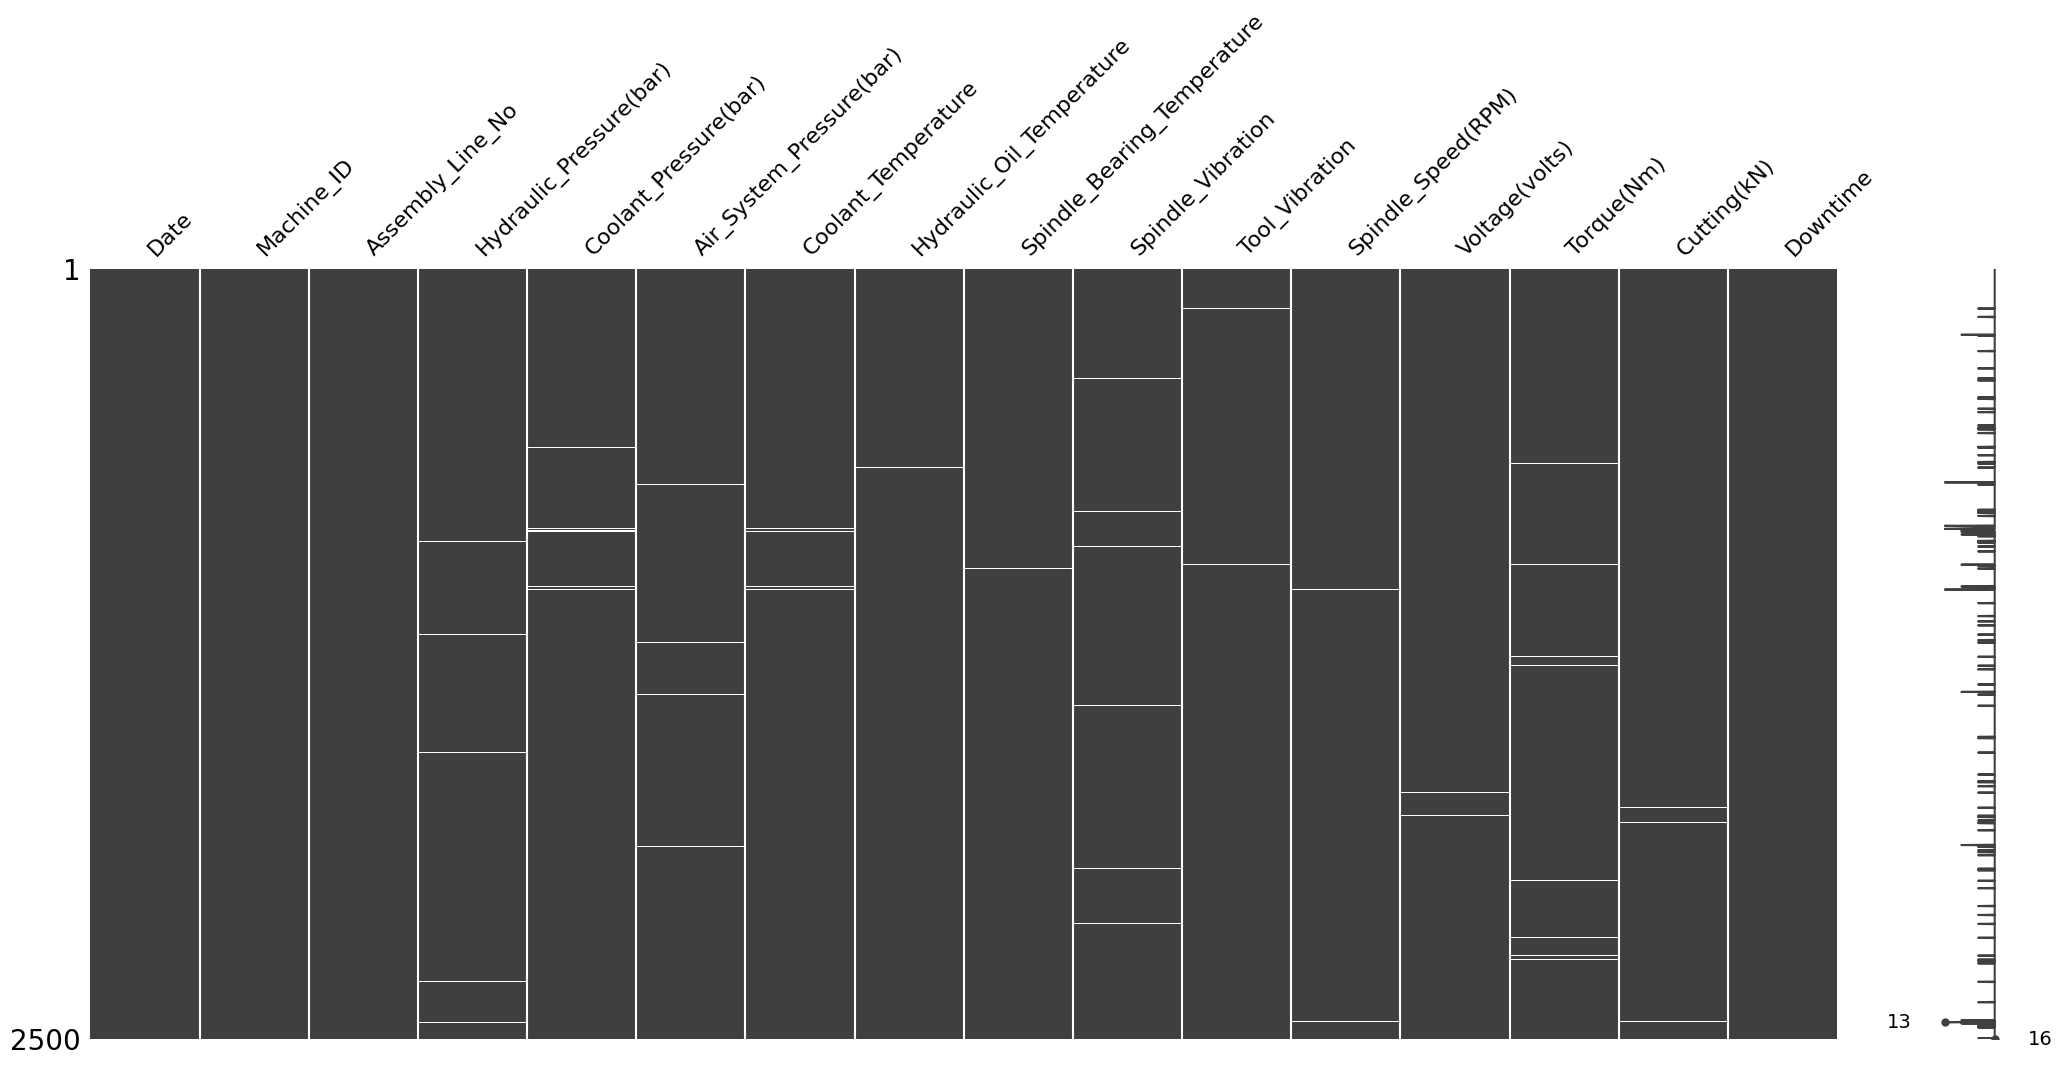

<Figure size 1000x500 with 0 Axes>

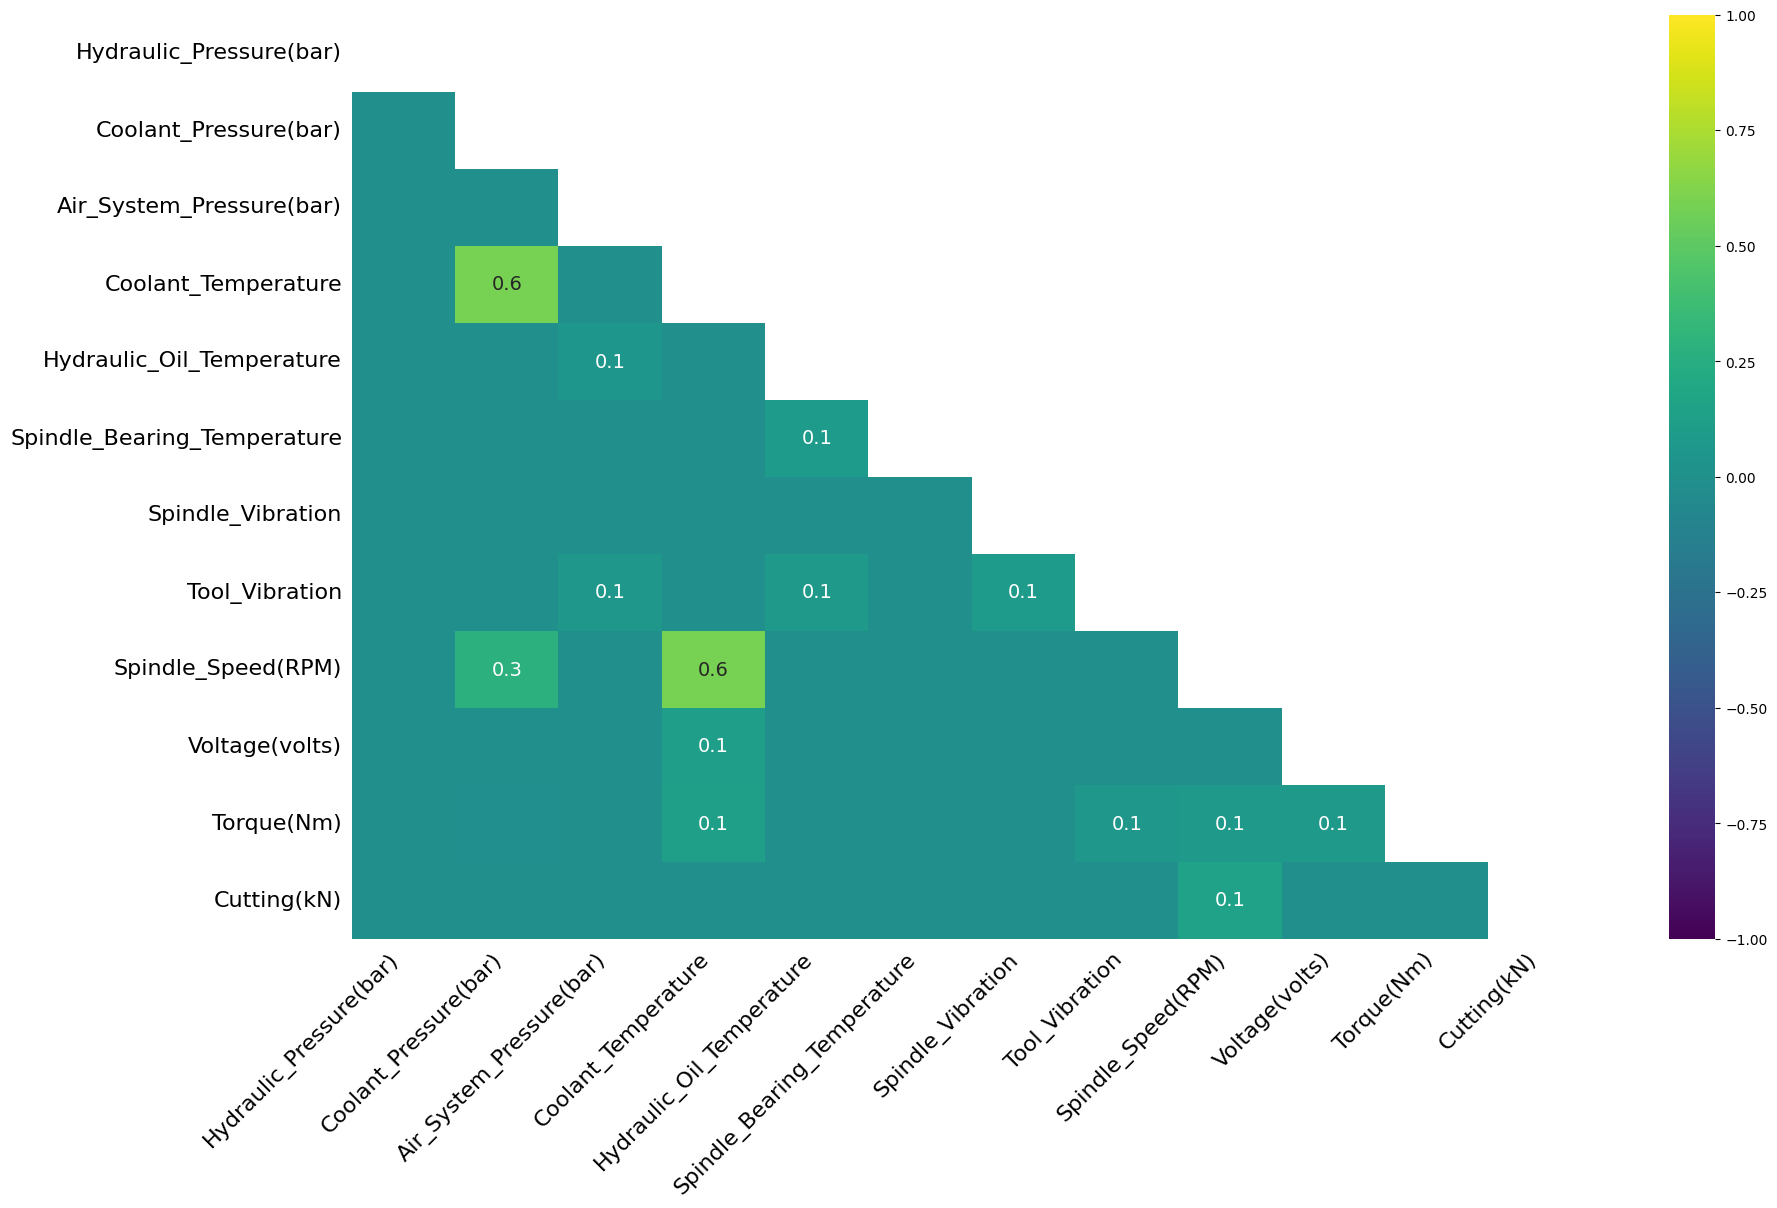

In [10]:
plt.figure(figsize=(10,5))
msno.matrix(df_raw)
plt.show()

plt.figure(figsize=(10,5))
msno.heatmap(df_raw, cmap="viridis")
plt.show()

In [11]:
# Importa la función para hacer la prueba Chi-Cuadrado
from scipy.stats import chi2_contingency 


# Filtra columnas numericas int y float
numerical_columns = df_raw.select_dtypes(include=['float', 'int']).columns.tolist()

# Crea indicadores binarios de datos faltantes
missing_indicators = df_raw[numerical_columns].isnull().astype(int)
missing_indicators["Target"] = (df_raw["Downtime"] == "Machine_Failure").astype(int)

# Realizar la prueba Chi-Cuadrado
chi_square_results = []
for column in numerical_columns:
    contingency_table = pd.crosstab(missing_indicators[column], missing_indicators['Target'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    decision = "Fail to Reject Null" if p_value > 0.05 else "Reject Null"
    chi_square_results.append({
        'Feature': column,
        'Chi-Square Statistic': chi2,
        'p-value': p_value,
        'Decision': decision
    })
    
chi_square_results_df = pd.DataFrame(chi_square_results)
print(chi_square_results_df)



                        Feature  Chi-Square Statistic   p-value  \
0       Hydraulic_Pressure(bar)              5.090532  0.024057   
1         Coolant_Pressure(bar)             17.623827  0.000027   
2      Air_System_Pressure(bar)              0.002465  0.960401   
3           Coolant_Temperature             10.400474  0.001260   
4     Hydraulic_Oil_Temperature              1.695900  0.192825   
5   Spindle_Bearing_Temperature              0.622268  0.430206   
6             Spindle_Vibration              0.415106  0.519389   
7                Tool_Vibration              0.000000  1.000000   
8            Spindle_Speed(RPM)              4.298464  0.038147   
9                Voltage(volts)              4.298464  0.038147   
10                   Torque(Nm)              0.243581  0.621632   
11                  Cutting(kN)              0.622268  0.430206   

               Decision  
0           Reject Null  
1           Reject Null  
2   Fail to Reject Null  
3           Reject Null 

In [12]:
!pip install fancyimpute


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [13]:
# 
from fancyimpute import KNN

numerical_columns = df_raw.select_dtypes(include = ["float", "int"]).columns
downtime_imputed = df_raw.copy()

numerical_data= df_raw[numerical_columns].to_numpy()


fancy_imputer = KNN(k=5)
imputed_data = fancy_imputer.fit_transform(numerical_data)

downtime_imputed[numerical_columns] = imputed_data

missing_after_fancyimpute = downtime_imputed.isnull().sum()
missing_after_fancyimpute


/workspaces/Machine_Downtime/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Machine_Downtime/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/workspaces/Machine_Downtime/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/2500 with 0 missing, elapsed time: 0.589
Imputing row 101/2500 with 0 missing, elapsed time: 0.589
Imputing row 201/2500 with 0 missing, elapsed time: 0.590
Imputing row 301/2500 with 0 missing, elapsed time: 0.590
Imputing row 401/2500 with 0 missing, elapsed time: 0.590
Imputing row 501/2500 with 0 missing, elapsed time: 0.591
Imputing row 601/2500 with 0 missing, elapsed time: 0.591
Imputing row 701/2500 with 0 missing, elapsed time: 0.591
Imputing row 801/2500 with 0 missing, elapsed time: 0.592
Imputing row 901/2500 with 1 missing, elapsed time: 0.592
Imputing row 1001/2500 with 0 missing, elapsed time: 0.592
Imputing row 1101/2500 with 0 missing, elapsed time: 0.593
Imputing row 1201/2500 with 0 missing, elapsed time: 0.593
Imputing row 1301/2500 with 0 missing, elapsed time: 0.593
Imputing row 1401/2500 with 0 missing, elapsed time: 0.593
Imputing row 1501/2500 with 0 missing, elapsed time: 0.594
Imputing row 1601/2500 with 0 missing, elapsed time: 0.594
Imputing 

Date                           0
Machine_ID                     0
Assembly_Line_No               0
Hydraulic_Pressure(bar)        0
Coolant_Pressure(bar)          0
Air_System_Pressure(bar)       0
Coolant_Temperature            0
Hydraulic_Oil_Temperature      0
Spindle_Bearing_Temperature    0
Spindle_Vibration              0
Tool_Vibration                 0
Spindle_Speed(RPM)             0
Voltage(volts)                 0
Torque(Nm)                     0
Cutting(kN)                    0
Downtime                       0
dtype: int64

In [14]:
print(f"Duplicados totales: {downtime_imputed.duplicated().sum()}")

Duplicados totales: 0


In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        